In [145]:
# Options Analysis

import os
import json
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import qgrid
from datetime import datetime

In [2]:

f1 = 'data/AMC-052821-0218-opt-chain.csv'
f2 = 'data/test.csv'

keys = ['putCall', 'symbol', 'description', 'exchangeName', 'bid', 'ask',
       'last', 'mark', 'bidSize', 'askSize', 'bidAskSize', 'lastSize',
       'highPrice', 'lowPrice', 'openPrice', 'closePrice', 'totalVolume',
       'tradeDate', 'tradeTimeInLong', 'quoteTimeInLong', 'netChange',
       'volatility', 'delta', 'gamma', 'theta', 'vega', 'rho',
       'openInterest', 'timeValue', 'theoreticalOptionValue',
       'theoreticalVolatility', 'optionDeliverablesList', 'strikePrice',
       'expirationDate', 'daysToExpiration', 'expirationType',
       'lastTradingDay', 'multiplier', 'settlementType', 'deliverableNote',
       'isIndexOption', 'percentChange', 'markChange', 'markPercentChange',
       'mini', 'inTheMoney', 'nonStandard']

option_df = pd.read_csv(f1, names=keys)

In [3]:
option_df['exp'] = pd.to_datetime(option_df['expirationDate'], unit='ms').apply(lambda x: x.strftime("%Y-%m-%d"))
option_df.set_index(pd.to_datetime(option_df['quoteTimeInLong'], unit='ms'),inplace=True)
option_df = option_df.rename_axis('timestamp')
option_df.index = option_df.index.tz_localize("UTC").tz_convert("US/Pacific")

# Option Analysis (Option Premium over time)

In [124]:
#------ filters (change as needed) -----------------

last_price = 28

#restrict timeframe of analysis
date_range  = (option_df.index > '2021-05-28 6:00 AM') &  (option_df.index < '2021-05-28 04:00 PM') 

#restrict delta
delta_filter =(option_df['delta'] < .55) & (option_df['delta'] > 0.45)

#restrict option type
call_filter = (option_df['putCall'] == "CALL")
put_filter = (option_df['putCall'] == "PUT")

#strikes above/below last price
strike_range = 4

#restrict strikes ITM and OTM around last price
strike_filter =  (option_df['strikePrice'] > last_price-strike_range) & (option_df['strikePrice'] < last_price+strike_range)

#filter by expiration
exp_filter = option_df['exp'] == "2021-05-28"

#option filter
call_option_filter = option_df['symbol'] == 'AMC_052821C25'

#full filter
full_call_filter = call_filter & strike_filter & date_range & exp_filter
full_put_filter = put_filter & strike_filter & date_range & exp_filter


<AxesSubplot:title={'center':'Volatility'}, xlabel='timestamp', ylabel='volatility'>

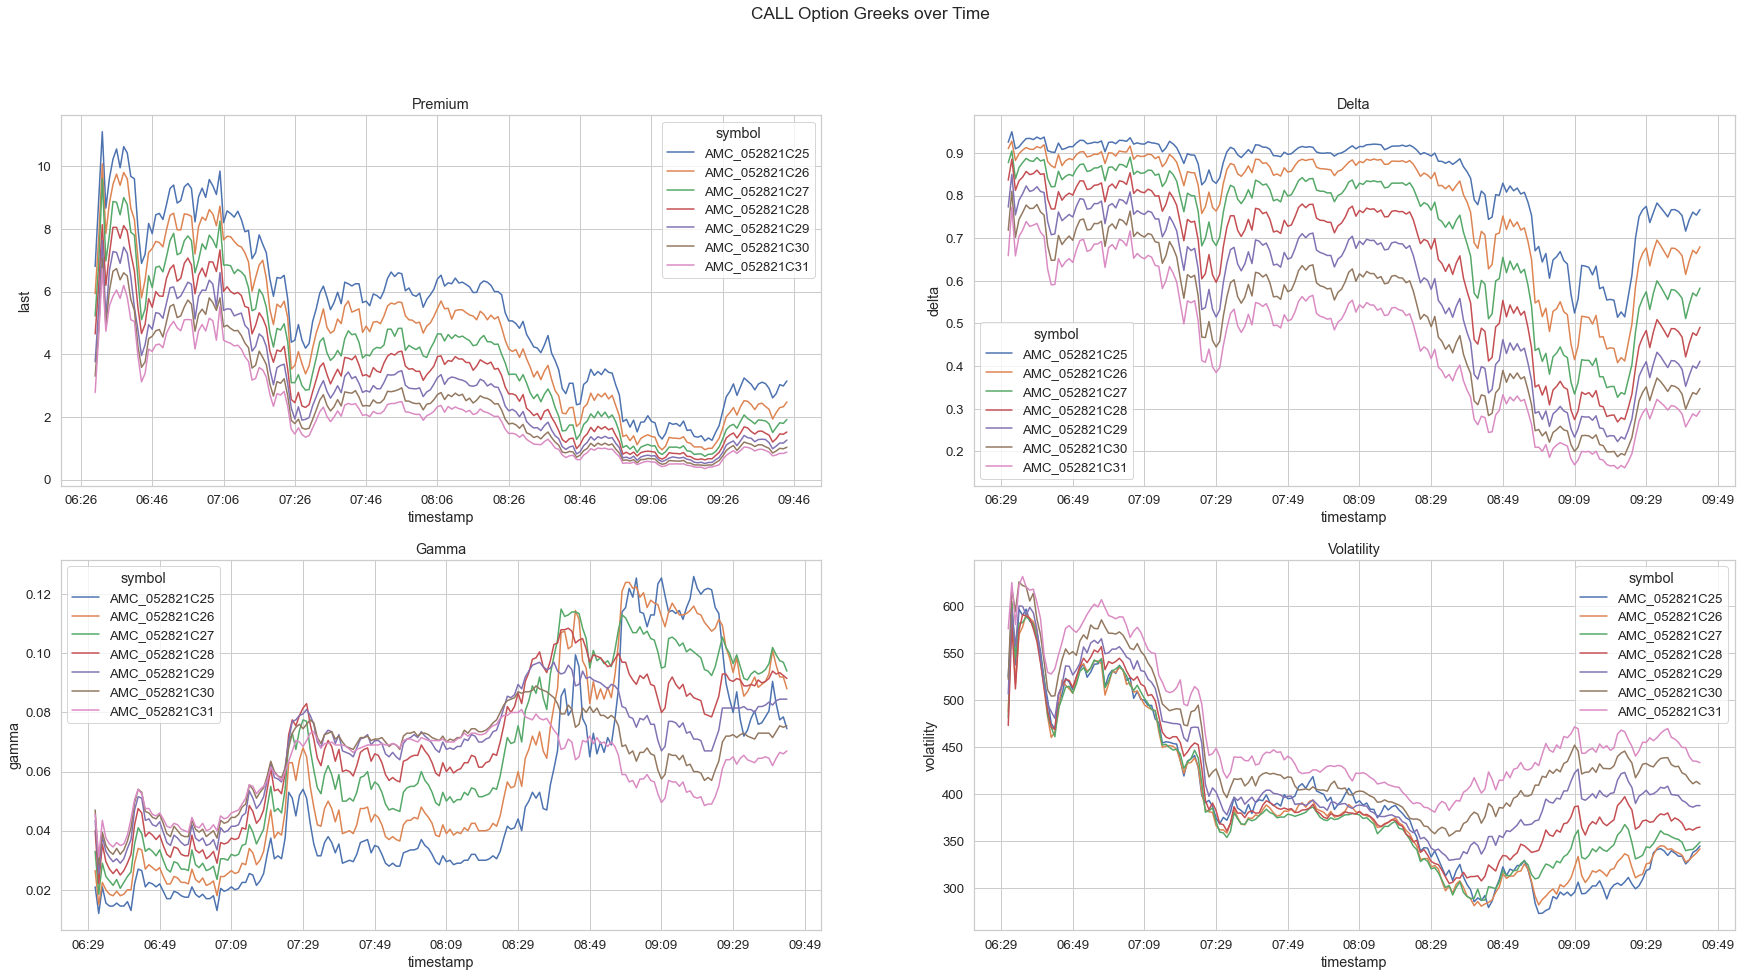

In [140]:
# Define the date format
date_form = DateFormatter("%H:%M",   tz=option_df.index.tz)
formatter = mdates.DateFormatter('%m/%d %T %Z', tz="US/Pacific")
sea.set(font_scale=1.2, style="whitegrid")
fig, ax = plt.subplots(2,2,figsize=(30,15))

chart_data = option_df[full_call_filter][['last','symbol','delta','gamma','volatility','vega']]

chart_data.shape[0]
#option_df[date_range].shape

chart = chart_data.groupby(['symbol',pd.Grouper(freq='1MIN')]).mean()
pd.set_option('display.max_rows', None)
#chart_data


#import mpl_toolkits.mplot3d.axes3d as p3



# Ensure a major tick for each week using (interval=1) 
for row in range(0,ax.shape[0]):
    for col in range(0,ax.shape[1]):
        ax[row,col].xaxis.set_major_formatter(date_form)
        ax[row,col].xaxis.set_major_locator(mdates.MinuteLocator(interval=20))
        
fig.suptitle("CALL Option Greeks over Time")
ax[0,0].set_title("Premium")
ax[0,1].set_title("Delta")
ax[1,0].set_title("Gamma")
ax[1,1].set_title("Volatility")                  
sea.lineplot(data=chart, x='timestamp', y='last', hue='symbol', ax=ax[0,0])
sea.lineplot(data=chart, x='timestamp', y='delta', hue='symbol', ax=ax[0,1])
sea.lineplot(data=chart, x='timestamp', y='gamma', hue='symbol', ax=ax[1,0])
sea.lineplot(data=chart, x='timestamp', y='volatility', hue='symbol', ax=ax[1,1])

<AxesSubplot:title={'center':'Volatility'}, xlabel='timestamp', ylabel='volatility'>

# PUT GREEK ANALYSIS

<AxesSubplot:title={'center':'Volatility'}, xlabel='timestamp', ylabel='volatility'>

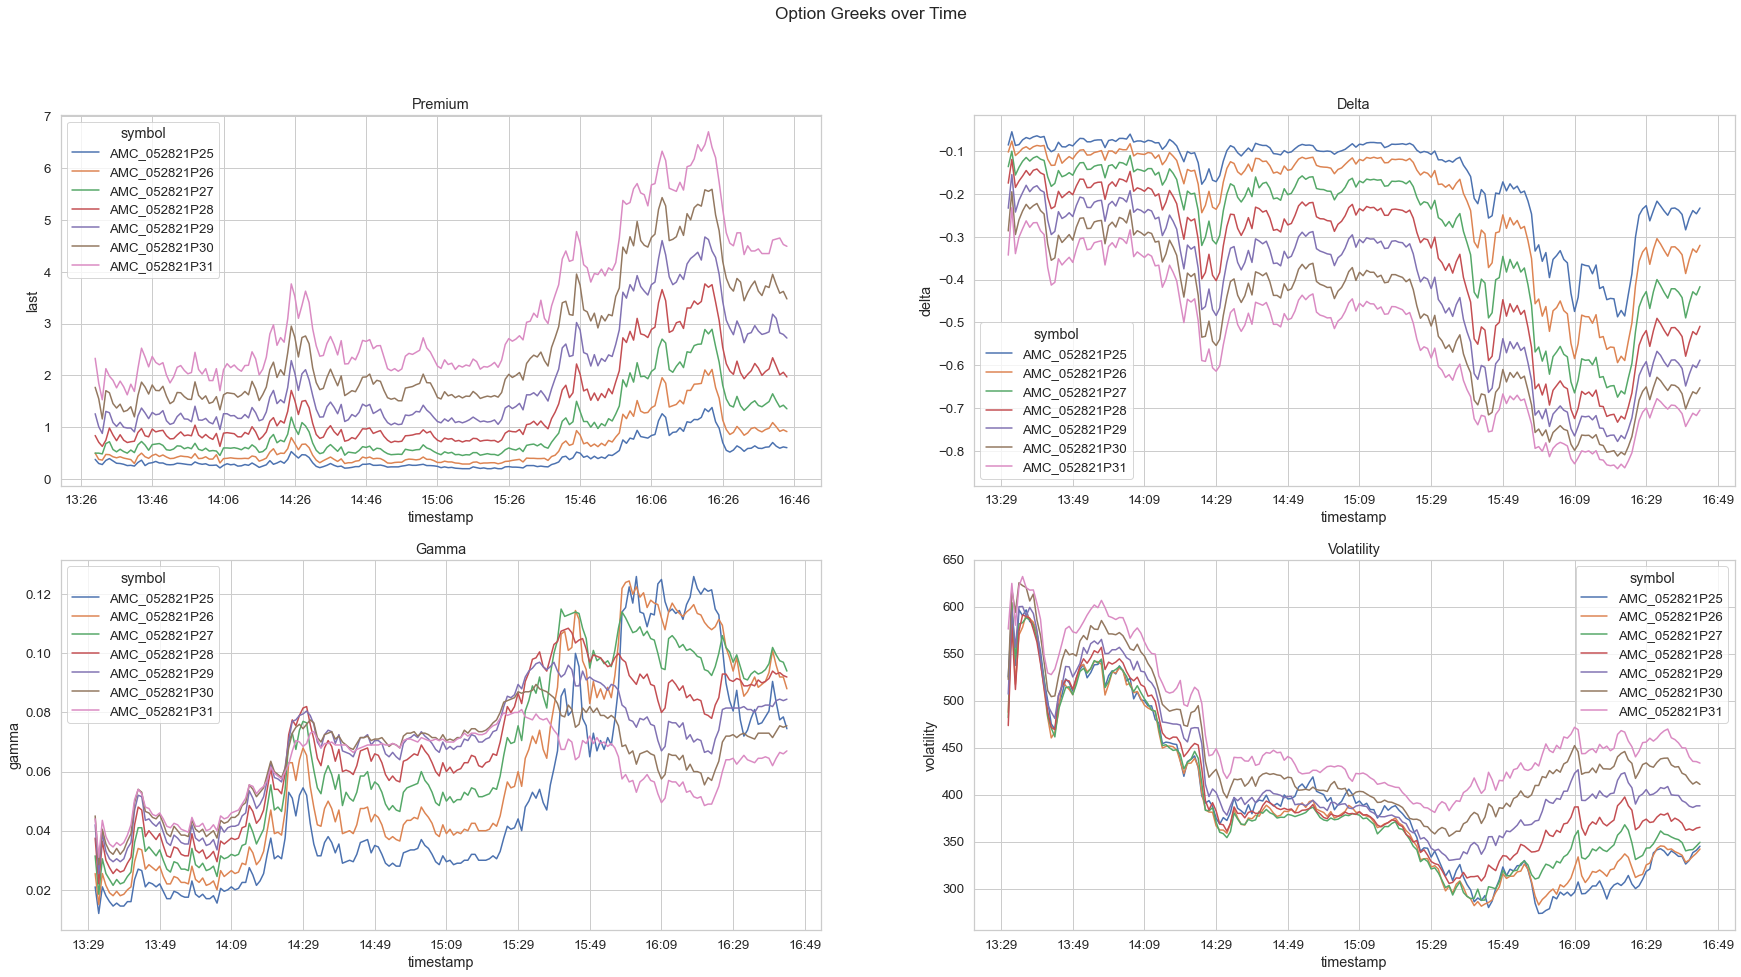

In [89]:


# Define the date format
date_form = DateFormatter("%H:%M")

sea.set(font_scale=1.2, style="whitegrid")
fig, ax = plt.subplots(2,2,figsize=(30,15))

chart_data = option_df[full_put_filter][['last','symbol','delta','gamma','volatility','vega']]

chart_data.shape[0]
#option_df[date_range].shape

chart = chart_data.groupby(['symbol',pd.Grouper(freq='1MIN')]).mean()
#chart


# Ensure a major tick for each week using (interval=1) 
for row in range(0,ax.shape[0]):
    for col in range(0,ax.shape[1]):
        ax[row,col].xaxis.set_major_formatter(date_form)
        ax[row,col].xaxis.set_major_locator(mdates.MinuteLocator(interval=20))
        
fig.suptitle("PUT Option Greeks over Time")
ax[0,0].set_title("Premium")
ax[0,1].set_title("Delta")
ax[1,0].set_title("Gamma")
ax[1,1].set_title("Volatility")                  
sea.lineplot(data=chart, x='timestamp', y='last', hue='symbol', ax=ax[0,0])
sea.lineplot(data=chart, x='timestamp', y='delta', hue='symbol', ax=ax[0,1])
sea.lineplot(data=chart, x='timestamp', y='gamma', hue='symbol', ax=ax[1,0])
sea.lineplot(data=chart, x='timestamp', y='volatility', hue='symbol', ax=ax[1,1])

In [141]:
exp_filter = option_df['exp'] == '2021-05-28'
strike_range = 50
call_filter = (option_df['putCall'] == "CALL") 
call_skew_filter = call_filter & (option_df['strikePrice'] > last_price-strike_range) & (option_df['strikePrice'] < last_price+strike_range)
strike_filter = option_df['symbol'] == 'AMC_052821C25'
option_df[call_skew_filter  & strike_filter].head()
# option_df['exp'] == "2021-05-24:1") &



,putCall,symbol,description,exchangeName,bid,ask,last,mark,bidSize,askSize,...,settlementType,deliverableNote,isIndexOption,percentChange,markChange,markPercentChange,mini,inTheMoney,nonStandard,exp
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-05-27 12:59:59.825000-07:00,CALL,AMC_052821C25,AMC May 28 2021 25 Call (Weekly),OPR,2.68,2.77,2.68,2.73,1,4,...,,NaN,NaN,309.16,2.08,316.95,True,False,False,2021-05-28
2021-05-27 12:59:59.825000-07:00,CALL,AMC_052821C25,AMC May 28 2021 25 Call (Weekly),OPR,2.68,2.77,2.68,2.73,1,4,...,,NaN,NaN,309.16,2.08,316.95,False,False,True,2021-05-28
2021-05-27 12:59:59.825000-07:00,CALL,AMC_052821C25,AMC May 28 2021 25 Call (Weekly),OPR,2.68,2.77,2.68,2.73,1,4,...,,NaN,NaN,309.16,2.08,316.95,False,False,True,2021-05-28
2021-05-27 12:59:59.825000-07:00,CALL,AMC_052821C25,AMC May 28 2021 25 Call (Weekly),OPR,2.68,2.77,2.68,2.73,1,4,...,,NaN,NaN,309.16,2.08,316.95,False,False,True,2021-05-28
2021-05-27 12:59:59.825000-07:00,CALL,AMC_052821C25,AMC May 28 2021 25 Call (Weekly),OPR,2.68,2.77,2.68,2.73,1,4,...,,NaN,NaN,309.16,2.08,316.95,False,False,True,2021-05-28


# Plotting Call Skew

[Text(0.5, 1.0, 'Price Skew')]

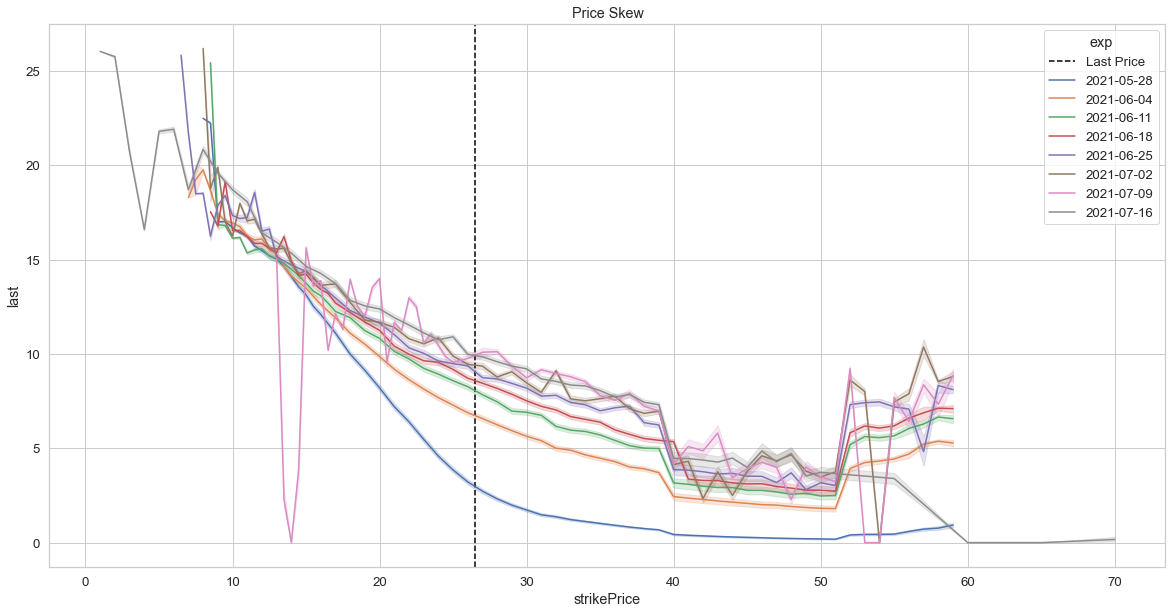

In [142]:
last_price = 26.52
strike_range = 150
call_filter = (option_df['putCall'] == "CALL") 
call_skew_filter = call_filter & (option_df['strikePrice'] > last_price-strike_range) & (option_df['strikePrice'] < last_price+strike_range)
# option_df['exp'] == "2021-05-24:1") &

plt.figure(figsize=(20,10))
plt.axvline(x=last_price, ymin=0, ymax=1, label='Last Price', color='black', linestyle='--')
sea.lineplot(data=option_df[call_skew_filter],x='strikePrice',y='last', hue='exp').set(title='Price Skew')
#option_df

[Text(0.5, 1.0, 'Price Skew')]

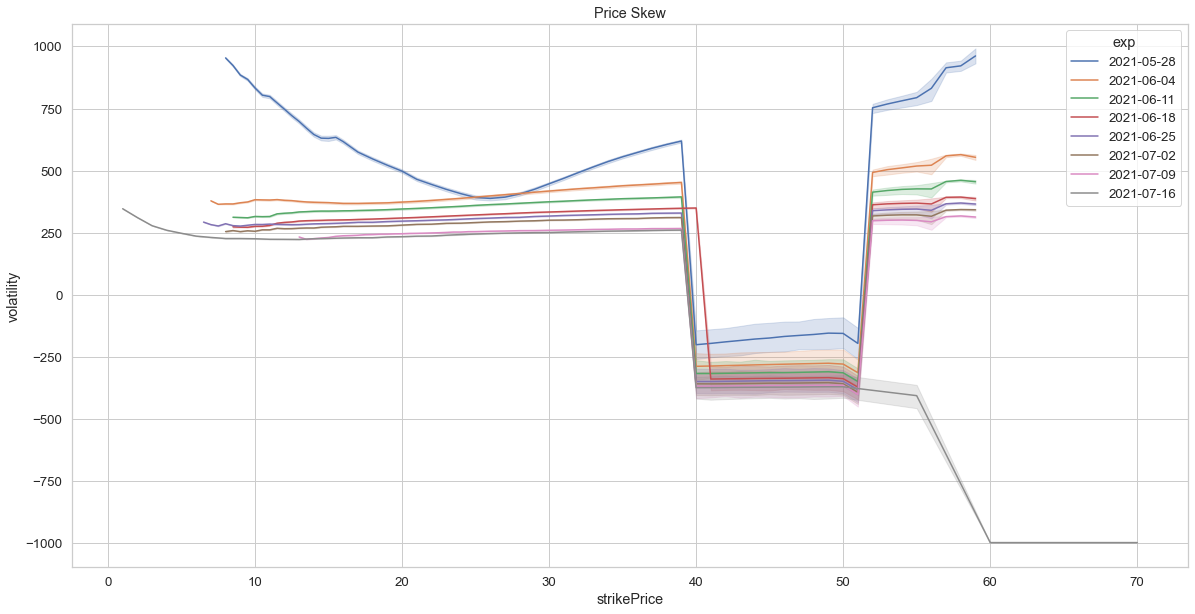

In [143]:
plt.figure(figsize=(20,10))
sea.lineplot(data=option_df[call_skew_filter],x='strikePrice',y='volatility', hue='exp').set(title='Price Skew')

# Plotting Put Skew

<AxesSubplot:xlabel='strikePrice', ylabel='mark'>

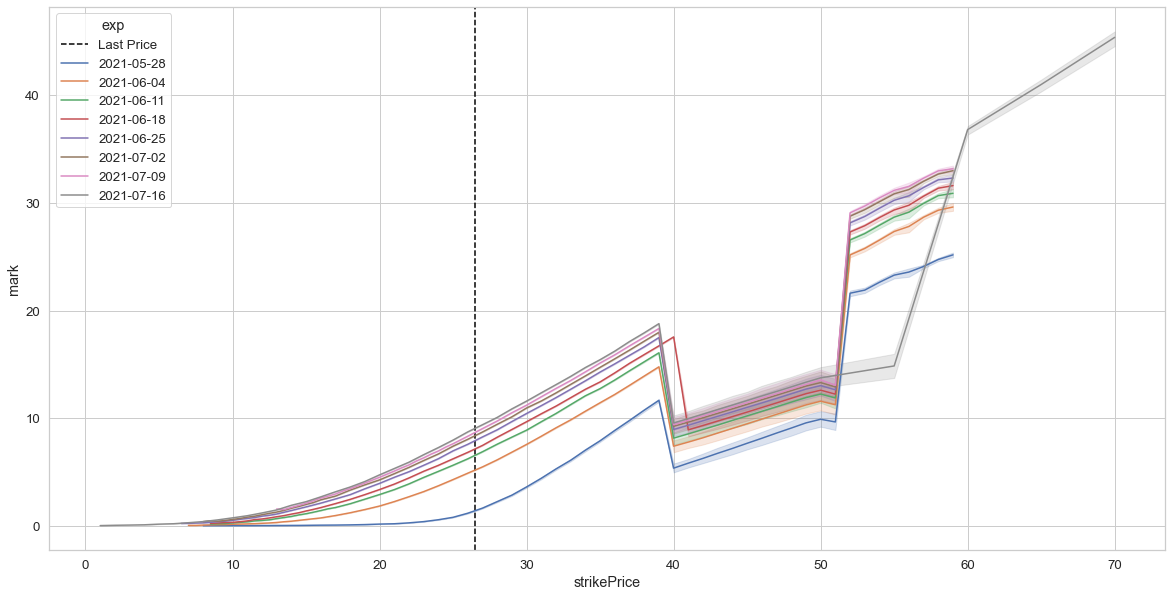

In [144]:
put_filter = (option_df['putCall'] == "PUT")
put_skew_filter = put_filter & (option_df['strikePrice'] > last_price-strike_range) & (option_df['strikePrice'] < last_price+strike_range)
# option_df['exp'] == "2021-05-24:1") &

plt.figure(figsize=(20,10))
plt.axvline(x=last_price, ymin=0, ymax=1, label='Last Price', color='black', linestyle='--')
sea.lineplot(data=option_df[put_skew_filter],x='strikePrice',y='mark', hue='exp')

# Finding Mispriced Options (Profit Opportunity!)

In [291]:
strike = 3475
strike_filter = (option_df['price'] == strike)
exp_filter = (option_df['exp'] == '2021-05-24:1' )
option_df[ put_filter & strike_filter & exp_filter]

,exp,price,putCall,symbol,description,exchangeName,bid,ask,last,mark,...,settlementType,deliverableNote,isIndexOption,percentChange,markChange,markPercentChange,inTheMoney,nonStandard,mini,parity
0,2021-05-24:1,3475.0,PUT,SPXW_052421P3475,SPXW May 24 2021 3475 Put (PM) (Weekly),OPR,0.0,0.05,0.05,0.03,...,P,,None,30600.0,0.02,24900.0,False,False,False,NaN


<AxesSubplot:xlabel='strike', ylabel='parity'>

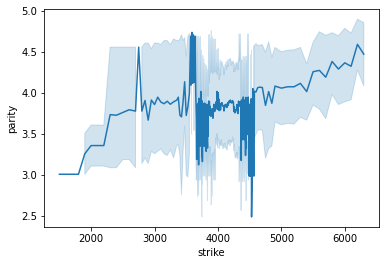

In [320]:
# We want to compare reciprocal prices for options CALL vs PUT to find gaps.
strike = 4120
strike_filter = (option_df['price'] == strike)
exp_filter = (option_df['exp'] == '2021-05-24:1' )


# Parity Formula:  C + PV(x) = P + S
# Call price + (Strike * interest) = Put Price + Current Price
#parity_df = pd.Dataframe(columns=['exp', 'strike','call_price', 'put_price', 'parity'])
parity_list = []
call_price = 0.0
put_price = 0.0
for exp in option_df['exp'].unique():
    exp_filter = (option_df['exp'] == exp )
    for strike in option_df[exp_filter]['price'].unique():
        strike_filter = (option_df['price'] == strike)
        call_price = option_df[call_filter & strike_filter & exp_filter]['mark'].apply(lambda x: x.item() if isinstance(x,pd.Series) else x)
        put_price = option_df[put_filter & strike_filter & exp_filter]['mark'].apply(lambda x: x.item() if isinstance(x,pd.Series)  else x)
        #print(f"exp: {exp} strike:{strike} type:{option_df[put_filter & strike_filter & exp_filter]}")
        #print(option_df[put_filter & strike_filter & exp_filter].values)
        #print(call_price + strike - put_price + last_price)
        parity = (call_price.item() + strike.item()) - (put_price.item() + last_price)
        parity_item = {'exp': exp, 'strike':strike,'call_price':call_price.item(), 'put_price':put_price.item() , 'last_price':last_price, 'parity':parity }
        parity_list.append(parity_item)

parity_df = pd.DataFrame(parity_list)



<AxesSubplot:xlabel='strike', ylabel='parity'>

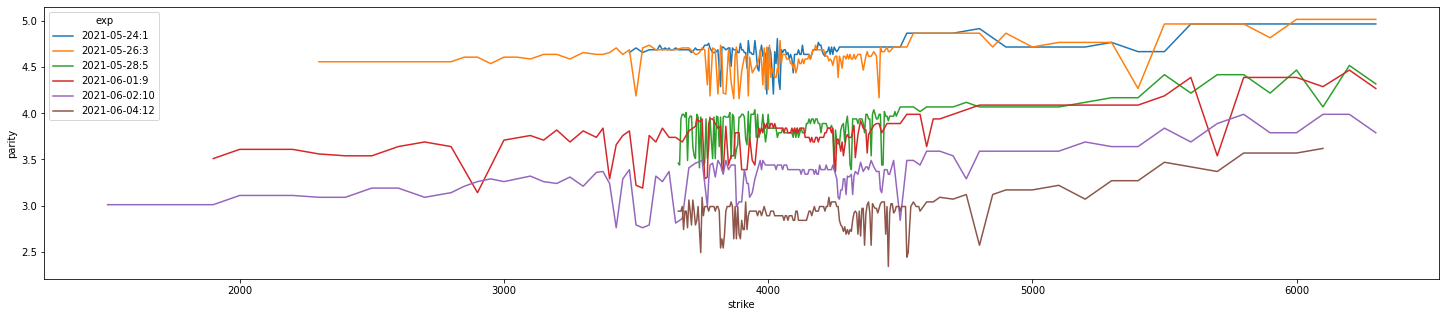

In [323]:
plt.figure(figsize=(25,5))
sea.lineplot(data=parity_df, x='strike',y='parity',hue='exp')